Show filed in working directory

In [5]:
import os
print os.listdir('./')

['base64data.py', 'Untitled.ipynb', 'nao_camera.png', 'README.md', 'naoqi_basic.ipynb', '.ipynb_checkpoints', 'get_sensor_data.py', 'survey.ipynb', 'set_joint_commands.py']


Open and execute python file that holds sample IMG message

In [6]:
with open('./base64data.py', 'rb') as file:
    string = file.read()
    
exec(string)

Base64-decode sample

In [91]:
from base64 import b64decode
data = b64decode(base64data)

This should be the number of elements in our list

In [14]:
320*240*3

# So we are looking at 320*240 pixels with 3 color channels each

230400

Test conversion of base64-decoded binary to base-10 integer

In [37]:
#  ' '.join(format(ord(i),'b').zfill(8) for i in st)
int(format(ord(data[0]), 'b').zfill(8), 2)

255

Convert list of pixels to nested list

In [86]:
width = 320
height = 240
channels = 3


def convert_binary_str_to_int(elem):
    """
    Converts a single Base64-decoded binary number into a base-10 integer.
    
    """
    return int(format(ord(elem), 'b').zfill(8), 2)


def convert_list_to_bmp(height, width, channels, data):
    """
    Converts a list of pixel channel values into a 3-dimensional array
    of the right size.
    
    """
    image = np.zeros((height, width, channels), dtype=np.uint8)
    for i in range(len(data) / channels):
        elem = i * channels
        x = i / width
        y = i % width
        image[height - 1 - x, y] = [data[elem], data[elem + 1], data[elem + 2]]  
    return image

In [87]:
new_data = []
for elem in data:
    new_data.append(convert_binary_str_to_int(elem))

In [88]:
image = convert_list_to_bmp(height, width, channels, new_data)

Display generated image

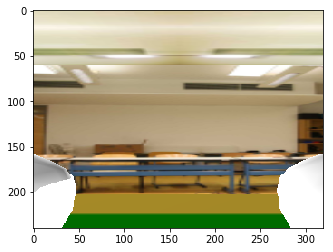

In [89]:
# From https://stackoverflow.com/questions/2659312/how-do-i-convert-a-numpy-array-to-and-display-an-image
from matplotlib import pyplot as plt
plt.imshow(image, interpolation='nearest')
plt.show()